> paper link: https://arxiv.org/pdf/2504.03967

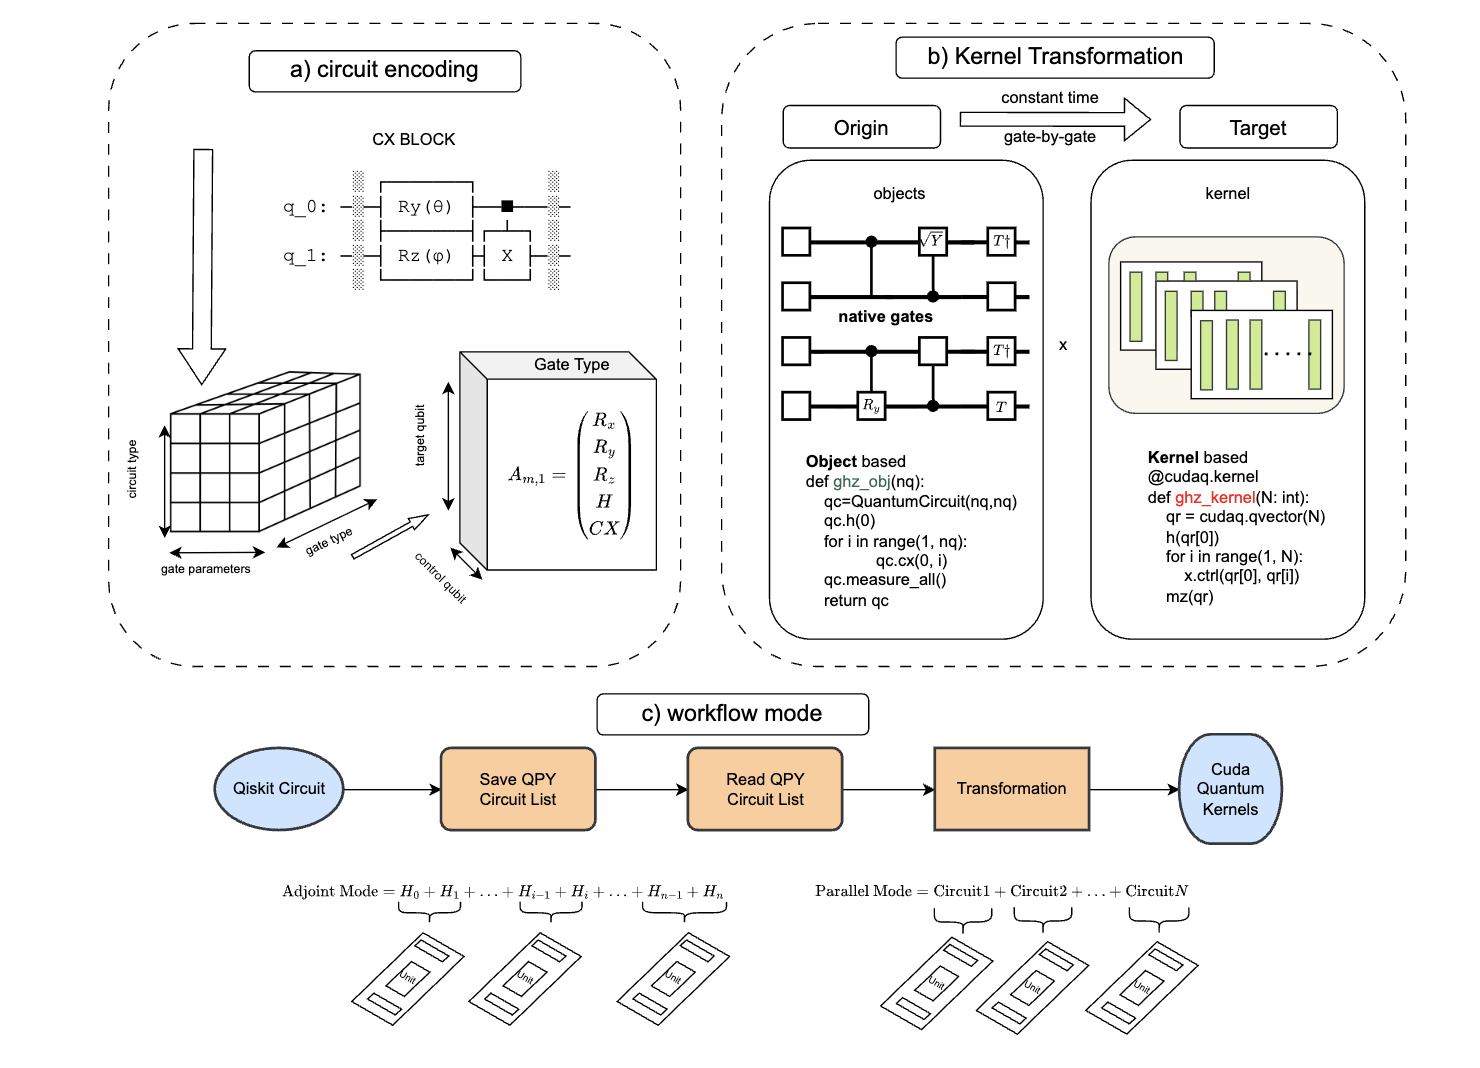

##  Preliminary
- Let's assume you already have a computational GPU node allocated on HPC
- Checking the NVIDIA GPU
    - `nvidia-smi`
- Create a env (we do not recommend using default such .local / HOME)
- Note that more than one GPU support need to enable [MPI](https://nvidia.github.io/cuda-quantum/latest/using/quick_start.html#install-cuda-q)
> the way we choose is high performance lustre file system

## 1. Install ENV
clone repo

```bash
git clone git@github.com:gzquse/qgear.git`

cd qgear
```
```bash
module load conda
conda create --prefix=/pscratch/sd/{location}/{username}/qgear -y python=3.11 pip
conda activate $SCRATCH/qgear
```

```bash
pip install -u qgear 
pip install -u ipykernel
python -m ipykernel install --user --name qgear --display-name qgear
```

test qgear install successfully
```bash 
qgear
```

<p align="center">
<pre>
   ___     ____ _____    _    ____                                                      
  / _ \   / ___| ____|  / \  |  _ \                                                     
 | | | | | |  _|  _|   / _ \ | |_) |                                                    
 | |_| | | |_| | |___ / ___ \|  _ <                                                     
  \__\_\  \____|_____/_/   \_\_| \_\                                                    


Installation successful!

Welcome to QGEAR. Run 'qgear.run_cudaq()' to speed up.
Fun fact: We love to use Emacs! 🐧
</pre>
</p>

## 2. Open Jupyter Notebook

### NERSC jupyter
https://jupyter.nersc.gov/

Select the kernel 
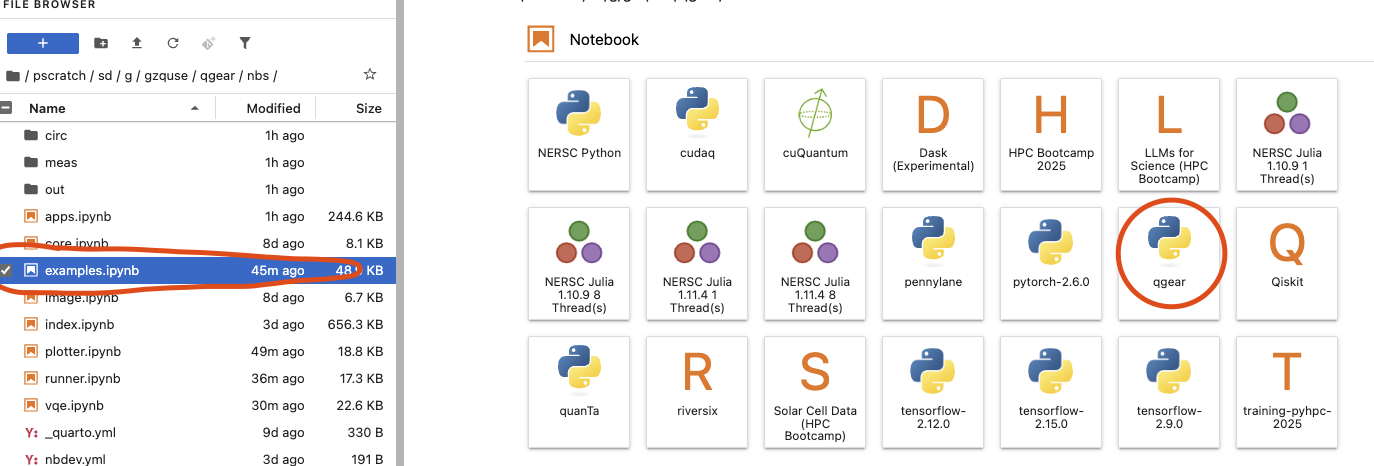


go to nbs/example.ipynb;
run example 
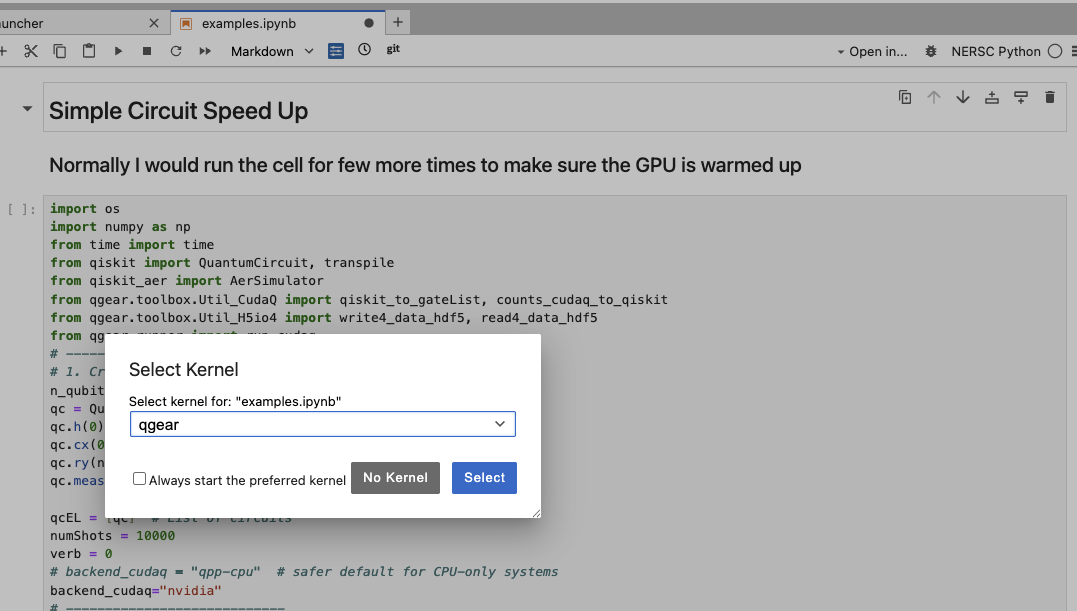

### Pypi
https://pypi.org/project/qgear/

### Demos

#### 1. simple speed up with random circuit and QFT
https://gzquse.github.io/qgear/examples.html

#### 2. quantum image encoding
> see appendix F in the paper
https://gzquse.github.io/qgear/apps.html

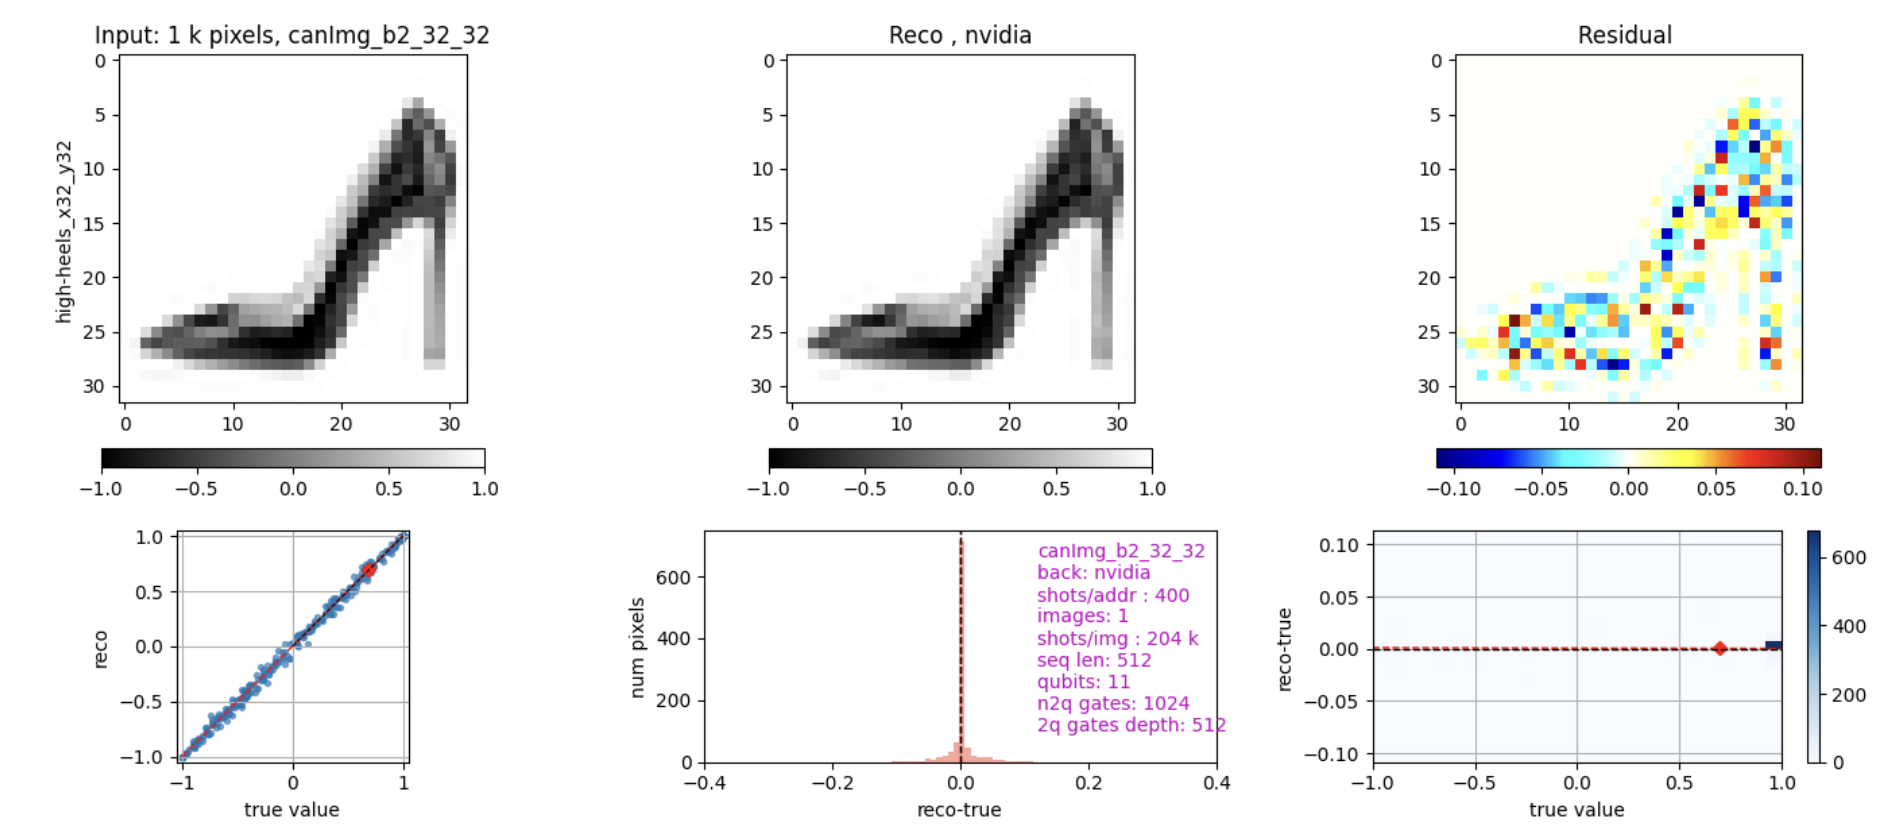


## local development

```sh
. ./pm_martin.dev.source

# make sure qgear package is installed in development mode
https://nbdev.fast.ai/tutorials/tutorial.html
pip3 install -e '.[dev]'
pip3 install qgear

# compile to have changes apply to qgear
nbdev_prepare
```

### Supported Quantum Gates

This is the list of quantum gates currently supported by the implementation, based on the `gateId` mapping.

| Gate ID | Gate Name        | Description                                                                 | Parameters                                                                                 | Example Usage |
|---------|-----------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|---------------|
| **1**   | **H** (Hadamard) | Creates superposition by mapping \(|0\rangle \to \frac{|0\rangle + |1\rangle}{\sqrt{2}}\) and \(|1\rangle \to \frac{|0\rangle - |1\rangle}{\sqrt{2}}\). | Target qubit `q0`                                                                           | `h(q0)`       |
| **2**   | **RY** rotation  | Rotation around the Y-axis by a given angle.                               | `angle` (in radians), target qubit `q0`                                                     | `ry(angles[j], q0)` |
| **3**   | **RZ** rotation  | Rotation around the Z-axis by a given angle.                               | `angle` (in radians), target qubit `q0`                                                     | `rz(angles[j], q0)` |
| **4**   | **CX** (CNOT)    | Controlled-X gate; flips target qubit if control qubit is \(|1\rangle\).   | Control qubit `q0`, target qubit `q1`                                                       | `x.ctrl(q0, q1)` |
| **5**   | **Measure**      | Measures the qubit in the computational basis.                            | Target qubit `q0`                                                                           | `mz(q0)` *(example)* |
| **6**   | **CP** (Controlled-Phase) | Applies a phase shift to the target qubit if control qubit is \(|1\rangle\). | `angle` (phase in radians), control qubit `q0`, target qubit `q1`                           | `r1.ctrl(angles[j], q0, q1)` |
| **7**   | **SWAP**         | Swaps the quantum states of two qubits.                                    | Qubit `q0`, qubit `q1`                                                                      | `swap(q0, q1)` |
| **8**   | **U** (U3 gate)  | General single-qubit rotation parameterized by three Euler angles.         | `theta`, `phi`, `lambda_` (all in radians), target qubit `q0`                               | `u3(theta, phi, lambda_, q0)` |

---

## Notes

- `q0` is the **primary target qubit**.
- `q1` is an **additional target or control qubit** (depending on the gate).
- `angles` is an array of rotation parameters in **radians**.
- `gate_type` and `qvector` are used to determine qubit mapping for multi-qubit gates.
- The **U3 gate** is the most general single-qubit gate and can represent any rotation.

---

## Example Gate Sequence

```python
# Apply Hadamard to qubit 0
h(q0)

# Rotate qubit 0 around Y-axis by pi/4
ry(math.pi/4, q0)

# Apply CNOT from qubit 0 to qubit 1
x.ctrl(q0, q1)

# Apply a controlled-phase gate
r1.ctrl(math.pi/2, q0, q1)

# Swap qubits 0 and 1
swap(q0, q1)

# Apply a general U3 rotation
u3(theta, phi, lambda_, q0)

### Goal

build the versatile all-in-one quantum accelerator for HPC-QPU hybrid regime that supports all the mainstream quantum frameworks.